<a href="https://colab.research.google.com/github/Mariyaben/MTCNN/blob/main/MTCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
!pip install mtcnn

In [34]:

import cv2

image_path = '/content/Tom_Cruise_avp_2014_4.jpg'
image = cv2.imread(image_path)


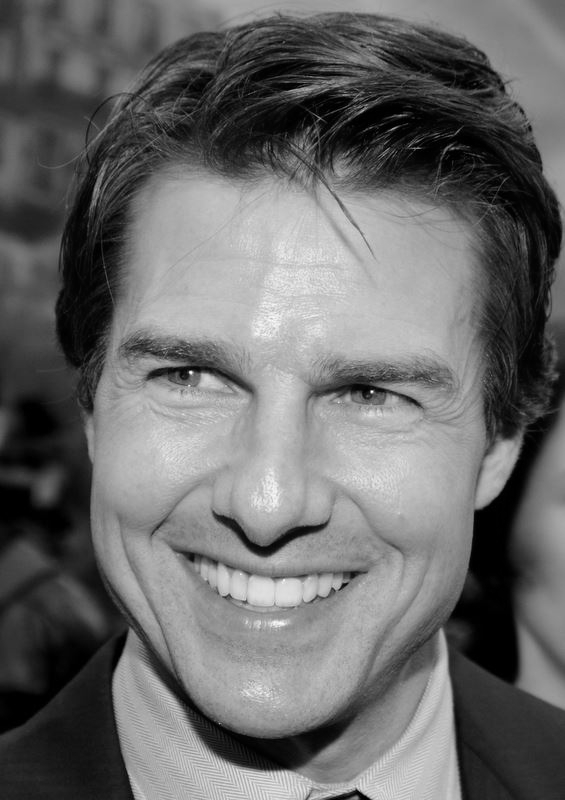

-1

In [35]:
from google.colab.patches import cv2_imshow

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray_image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

cv2_imshow(gray_image)
cv2.waitKey(0)

In [36]:
from mtcnn import MTCNN

detector = MTCNN()
faces = detector.detect_faces(image)


In [37]:
import numpy as np
from skimage.draw import rectangle_perimeter


for face in faces:
    x, y, w, h = face['box']

    start = (y, x)
    end = (y + h - 1, x + w - 1)

    rr, cc = rectangle_perimeter(start=start, end=end, shape=image.shape)

    image[rr, cc] = [0, 255, 0]




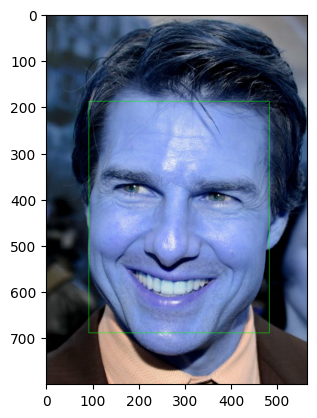

In [38]:
import matplotlib.pyplot as plt

plt.imshow(image)
plt.show()

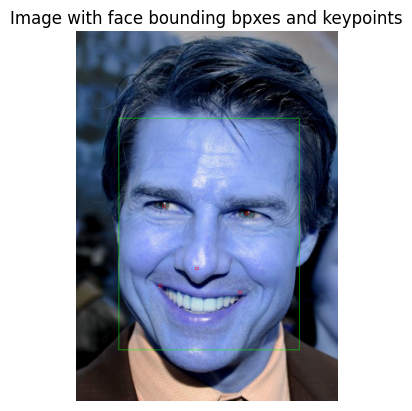

In [41]:


for face in faces:
    keypoints = face['keypoints']
    for kp_name, (kx, ky) in keypoints.items():

        size = 5
        half_size = size // 2

        kx, ky = int(kx), int(ky)


        start_row = max(0, ky - half_size)
        start_col = max(0, kx - half_size)
        end_row = min(image.shape[0] - 1, ky + half_size)
        end_col = min(image.shape[1] - 1, kx + half_size)

        rr, cc = rectangle_perimeter(start=(start_row, start_col),
                                     end=(end_row, end_col),
                                     shape=image.shape)

        image[rr, cc] = [255, 0, 0]
plt.imshow(image)
plt.title('Image with face bounding bpxes and keypoints')
plt.axis('off')
plt.show()
